In [3]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.animation as animation
from tqdm import tqdm

# Método de Yoshida

In [4]:
w0 = - ( 2.**(1./3.))/(2. - 2.**(1./3.))
w1 =  ( 1. )/( 2. - 2.**(1./3.))
c1 = w1/2.
c2 = (w0 + w1)/2.
c3 = c2
c4 = c1
d1 = w1
d2 = w0
d3 = d1
print(c1,c2,c3,c4) 
print(d1,d2,d3)
print(c1+c2+c3+c4) 
print(d1+d2+d3)

0.6756035959798289 -0.17560359597982877 -0.17560359597982877 0.6756035959798289
1.3512071919596578 -1.7024143839193153 1.3512071919596578
1.0000000000000002
1.0000000000000002


In [5]:
# Definimos la fisica
m = 10.
k = 200.
l = 1.
g = 9.81
omega2 = k/m

In [6]:
def GetA(r):
    
    x,y = r
    
    ax = -omega2*(1 - 1/np.sqrt(x**2+y**2))*x
    ay = -omega2*(1 - 1/np.sqrt(x**2+y**2))*y + g
    
    return np.array([ax,ay])

In [7]:
def GetSimplecticAlgorithm(f,r0,v0,t):
    
    h = t[1] - t[0]
    
    r = np.zeros((len(t),2))
    v = np.zeros_like(r)
    
    r[0] = r0
    v[0] = v0
    
    for i in range(1,len(t)):
        
        r1 = r[i-1] + c1*v[i-1]*h
        v1 = v[i-1] + d1*h*f(r1)
        
        r2 = r1 + c2*v1*h
        v2 = v1 + d2*h*f(r2)
        
        r3 = r2 + c3*v2*h
        v3 = v2 + d3*h*f(r3)
        
        r[i] = r3 + c4*v3*h
        v[i] = v3
        
    r = r[::10]
    v = v[::10]
    t = t[::10]
        
    return r,v,t

In [8]:
t = np.linspace(0,10,1000)
r0 = np.array([1,2])
v0 = np.array([0,0])
r,v,t = GetSimplecticAlgorithm(GetA,r0,v0,t)

In [9]:
x = r[:,0]
y =-r[:,1]
vx = v[:,0]
vy = v[:,1]

<IPython.core.display.Javascript object>


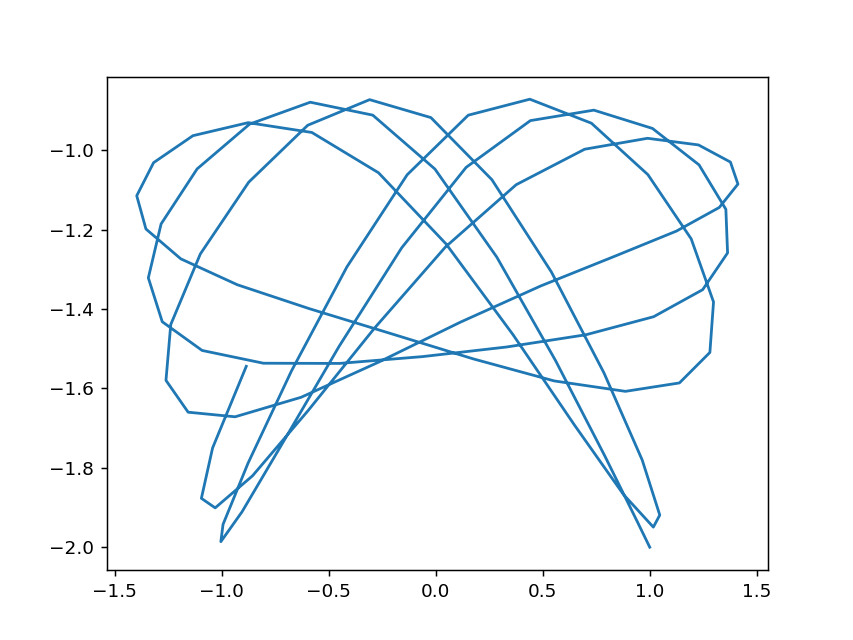

In [10]:
plt.plot(x,y)